# Transform

Features names:
* cpi_energy -> cpi_energy
* gasoline_price -> gasoline_price_per_gallon
* imports_and_exports -> Undefined
* input_utilization -> Needs aggregation
* oil_production -> Needs filtering and aggregation
* us_dollar_index -> us_dollar_index
* volatility_index -> volatility_index
* wti_prices -> price_per_barrel
* Stock Price -> Undefined

In [1]:
%load_ext autoreload
%autoreload 2

In [3]:
import os
os.chdir('..')
print(os.getcwd())

c:\Users\User\Desktop\DS\Projects\oil-optimization


In [4]:
import pandas as pd
from datetime import date
from oil_optimization.utils.io_helpers import read_yaml
from datetime import timedelta

def setup():
    config = read_yaml('config/config.yml')
    data_dir = config['data_ingestion']['root_dir']
    raw_data_dir = data_dir + '/raw'
    file_list = os.listdir(raw_data_dir)

    dataframes = {}
    for filename in file_list:
        key = filename[:-4] #Removing .csv extension from filename
        try:
            dataframes[key] = pd.read_csv(f'{raw_data_dir}/{filename}', parse_dates=['period'])
        except FileNotFoundError as e:
            print(e)
            
    return dataframes   

df_dict = setup()

In [5]:
features_df = pd.DataFrame()
today = date.today().strftime('%Y-%m-%d')
#Define base DataFrame
features_df['period'] =  pd.date_range(start='2015-01-02',
                                       end=today,freq='W') - timedelta(days=2)
#Setting key to merge with monthly data
features_df['year_month'] = features_df['period'].dt.strftime('%Y-%m')

In [103]:
features_df

,period,year_month
0,2015-01-02,2015-01
1,2015-01-09,2015-01
2,2015-01-16,2015-01
3,2015-01-23,2015-01
4,2015-01-30,2015-01
...,...,...
560,2025-09-26,2025-09
561,2025-10-03,2025-10
562,2025-10-10,2025-10
563,2025-10-17,2025-10


In [100]:
import sys
sys.getsizeof(df_dict)

272

### cpi_energy

In [32]:
df_cpi = df_dict['cpi_energy']
#Filtering relevant data
df_cpi_filter = df_cpi.loc[:,['period','value']]
df_cpi_filter['year_month'] = df_cpi_filter['period'].dt.strftime('%Y-%m')

In [33]:
df_cpi_filter

,period,value,year_month
0,2015-01-01,199.926,2015-01
1,2015-02-01,203.021,2015-02
2,2015-03-01,205.757,2015-03
3,2015-04-01,203.577,2015-04
4,2015-05-01,208.973,2015-05
...,...,...,...
124,2025-05-01,275.406,2025-05
125,2025-06-01,278.012,2025-06
126,2025-07-01,275.044,2025-07
127,2025-08-01,276.936,2025-08


In [44]:
features_df

,period,year_month
0,2015-01-02,2015-01
1,2015-01-09,2015-01
2,2015-01-16,2015-01
3,2015-01-23,2015-01
4,2015-01-30,2015-01
...,...,...
560,2025-09-26,2025-09
561,2025-10-03,2025-10
562,2025-10-10,2025-10
563,2025-10-17,2025-10


In [ ]:
merge_periods = features_df.groupby('year_month').first().reset_index()
merge_cpi = merge_periods.merge(df_cpi_filter, 
                                on='year_month',
                                how='left',
                                suffixes=('','_y')).ren

In [38]:
merge_cpi

,year_month,period,period_y,value
0,2015-01,2015-01-02,2015-01-01,199.926
1,2015-02,2015-02-06,2015-02-01,203.021
2,2015-03,2015-03-06,2015-03-01,205.757
3,2015-04,2015-04-03,2015-04-01,203.577
4,2015-05,2015-05-01,2015-05-01,208.973
...,...,...,...,...
125,2025-06,2025-06-06,2025-06-01,278.012
126,2025-07,2025-07-04,2025-07-01,275.044
127,2025-08,2025-08-01,2025-08-01,276.936
128,2025-09,2025-09-05,2025-09-01,281.120


In [35]:
merge_periods

,year_month,period
0,2015-01,2015-01-02
1,2015-02,2015-02-06
2,2015-03,2015-03-06
3,2015-04,2015-04-03
4,2015-05,2015-05-01
...,...,...
125,2025-06,2025-06-06
126,2025-07,2025-07-04
127,2025-08,2025-08-01
128,2025-09,2025-09-05


In [42]:
df_cpi_final = features_df.merge(merge_cpi,on='period', how='left')[['period','value']]
df_cpi_final

,period,value
0,2015-01-02,199.926
1,2015-01-09,NaN
2,2015-01-16,NaN
3,2015-01-23,NaN
4,2015-01-30,NaN
...,...,...
561,2025-10-03,NaN
562,2025-10-10,NaN
563,2025-10-17,NaN
564,2025-10-24,NaN


In [114]:
features_df = features_df.merge(df_cpi_final,on='period',how='left')

In [115]:
features_df

,period,year_month,cpi_energy
0,2015-01-02,2015-01,199.926
1,2015-01-09,2015-01,NaN
2,2015-01-16,2015-01,NaN
3,2015-01-23,2015-01,NaN
4,2015-01-30,2015-01,NaN
...,...,...,...
560,2025-09-26,2025-09,NaN
561,2025-10-03,2025-10,NaN
562,2025-10-10,2025-10,NaN
563,2025-10-17,2025-10,NaN


In [46]:
from src.oil_optimization.data_pipeline.preprocessor import merge_dataframe, monthly_merge

periods_df, feature_df_filter = monthly_merge(main_df=features_df, feature_df=df_cpi)
merge_df = merge_dataframe(periods_df,feature_df_filter, merge_on='year_month' ,out_label='cpi_energy')
final_df = merge_dataframe(features_df, merge_df)
final_df

,period,year_month,cpi_energy
0,2015-01-02,2015-01,199.926
1,2015-01-09,2015-01,NaN
2,2015-01-16,2015-01,NaN
3,2015-01-23,2015-01,NaN
4,2015-01-30,2015-01,NaN
...,...,...,...
561,2025-10-03,2025-10,NaN
562,2025-10-10,2025-10,NaN
563,2025-10-17,2025-10,NaN
564,2025-10-24,2025-10,NaN


### gasoline_price

<Axes: >

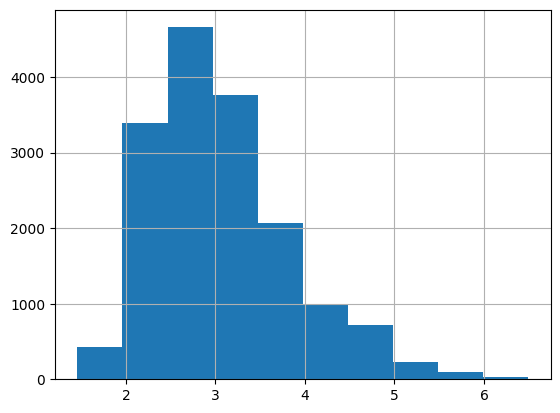

In [ ]:
df_dict['gasoline_price']['value'].hist()

In [ ]:
df_dict['gasoline_price']['value'].skew()

np.float64(0.9614046289893812)

In [ ]:
counts = pd.cut(df_dict['gasoline_price']['value'],bins=10).value_counts(normalize=True).sort_index().to_frame()
counts['cumsum'] = counts['proportion'].cumsum()
counts.round(2)

,proportion,cumsum
value,,
"(1.452, 1.961]",0.03,0.03
"(1.961, 2.465]",0.21,0.23
"(2.465, 2.968]",0.28,0.52
"(2.968, 3.472]",0.23,0.75
"(3.472, 3.976]",0.13,0.87
"(3.976, 4.48]",0.06,0.93
"(4.48, 4.984]",0.04,0.98
"(4.984, 5.487]",0.01,0.99
"(5.487, 5.991]",0.01,1.00


In [ ]:
df_dict['gasoline_price'].groupby('area-name')['value'].skew()

area-name
BOSTON                      0.836710
CALIFORNIA                  0.525378
CHICAGO                     0.760264
CLEVELAND                   0.646316
COLORADO                    0.663873
DENVER                      0.666483
FLORIDA                     0.736960
HOUSTON                     0.866693
LOS ANGELES                 0.575509
MASSACHUSETTS               0.827184
MIAMI                       0.788394
MINNESOTA                   0.647136
NEW YORK                    0.836262
NEW YORK CITY               0.791803
OHIO                        0.628195
PADD 1                      0.741191
PADD 1A                     0.834042
PADD 1B                     0.754137
PADD 1C                     0.702538
PADD 2                      0.682960
PADD 3                      0.799323
PADD 4                      0.648976
PADD 5                      0.550293
PADD 5 EXCEPT CALIFORNIA    0.569162
SAN FRANCISCO               0.495932
SEATTLE                     0.382715
TEXAS                       

In [ ]:
import datetime
df_dict['gasoline_price']

df_gasoline = df_dict['gasoline_price']
df_gasoline_agg = df_gasoline.groupby('period')['value'].mean().reset_index()

df_gasoline_agg['period'] = df_gasoline_agg['period'] - datetime.timedelta(3)

features_df.merge(df_gasoline_agg, on='period',how='left')

,period,year_month,value
0,2015-01-02,2015-01,2.385552
1,2015-01-09,2015-01,2.300862
2,2015-01-16,2015-01,2.221552
3,2015-01-23,2015-01,2.181103
4,2015-01-30,2015-01,2.194793
...,...,...,...
561,2025-10-03,2025-10,3.421241
562,2025-10-10,2025-10,3.363000
563,2025-10-17,2025-10,3.338172
564,2025-10-24,2025-10,3.338138


In [14]:
from src.oil_optimization.data_pipeline.preprocessor import weekly_merge

weekly_merge(main_df=features_df, feature_df=df_gasoline, out_label='gasoline_price')

,period,year_month,gasoline_price
0,2015-01-02,2015-01,2.385552
1,2015-01-09,2015-01,2.300862
2,2015-01-16,2015-01,2.221552
3,2015-01-23,2015-01,2.181103
4,2015-01-30,2015-01,2.194793
...,...,...,...
561,2025-10-03,2025-10,3.421241
562,2025-10-10,2025-10,3.363000
563,2025-10-17,2025-10,3.338172
564,2025-10-24,2025-10,3.338138


### imports_and_exports

In [ ]:
df_imp_exp = df_dict['imports_and_exports']
cols = ['period','process-name','value']
df_imp_exp = df_imp_exp[cols]
df_imp_exp = df_imp_exp[df_imp_exp['process-name'].isin(['Imports','Exports'])]

df_imp_exp = df_imp_exp.pivot(columns=['process-name'],values='value',index='period')

features_df.merge(df_imp_exp,on='period',how='left')

In [7]:
df_imp_exp

process-name,Exports,Imports
period,,
2015-01-02,388,6856
2015-01-09,388,7492
2015-01-16,388,7218
2015-01-23,502,7422
2015-01-30,502,7387
...,...,...
2025-09-26,3751,5833
2025-10-03,3590,6403
2025-10-10,4466,5525


### input_utilization

In [ ]:
df_input = df_dict['input_utilization']


df_input_sorted = df_input.sort_values(by=['period','area-name'])
df_input_refinery = df_input_sorted.pivot(index='period',columns='area-name',values='value')
df_input_refinery.columns = ['East Coast (PADD 1)',
                             'Midwest (PADD 2)',
                             'Gulf Coast (PADD 3)',
                             'Rocky Mountain (PADD 4)',
                             'West Coast (PADD 5)']


,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2015-01-02,R20,PADD 2,EPC0,Crude Oil,YIY,Refinery Net Input,WCRRIP22,Midwest (PADD 2) Refiner Net Input of Crude Oi...,3600,MBBL/D
1,2015-01-02,R40,PADD 4,EPC0,Crude Oil,YIY,Refinery Net Input,WCRRIP42,Rocky Mountain (PADD 4) Refiner Net Input of C...,579,MBBL/D
2,2015-01-02,R50,PADD 5,EPC0,Crude Oil,YIY,Refinery Net Input,WCRRIP52,West Coast (PADD 5) Refiner Net Input of Crude...,2439,MBBL/D
3,2015-01-02,R10,PADD 1,EPC0,Crude Oil,YIY,Refinery Net Input,WCRRIP12,East Coast (PADD 1) Refiner Net Input of Crude...,1158,MBBL/D
4,2015-01-02,R30,PADD 3,EPC0,Crude Oil,YIY,Refinery Net Input,WCRRIP32,Gulf Coast (PADD 3) Refiner Net Input of Crude...,8643,MBBL/D
...,...,...,...,...,...,...,...,...,...,...,...
2820,2025-10-24,R40,PADD 4,EPC0,Crude Oil,YIY,Refinery Net Input,WCRRIP42,Rocky Mountain (PADD 4) Refiner Net Input of C...,603,MBBL/D
2821,2025-10-24,R20,PADD 2,EPC0,Crude Oil,YIY,Refinery Net Input,WCRRIP22,Midwest (PADD 2) Refiner Net Input of Crude Oi...,3418,MBBL/D
2822,2025-10-24,R10,PADD 1,EPC0,Crude Oil,YIY,Refinery Net Input,WCRRIP12,East Coast (PADD 1) Refiner Net Input of Crude...,839,MBBL/D
2823,2025-10-24,R50,PADD 5,EPC0,Crude Oil,YIY,Refinery Net Input,WCRRIP52,West Coast (PADD 5) Refiner Net Input of Crude...,1803,MBBL/D


In [87]:
df_input_sorted['series-description'].unique()

array(['East Coast (PADD 1) Refiner Net Input of Crude Oil (Thousand Barrels per Day)',
       'Midwest (PADD 2) Refiner Net Input of Crude Oil (Thousand Barrels per Day)',
       'Gulf Coast (PADD 3) Refiner Net Input of Crude Oil (Thousand Barrels per Day)',
       'Rocky Mountain (PADD 4) Refiner Net Input of Crude Oil (Thousand Barrels per Day)',
       'West Coast (PADD 5) Refiner Net Input of Crude Oil (Thousand Barrels per Day)'],
      dtype=object)

In [34]:
features_df.merge(df_input_refinery,right_index=True, left_on='period',how='left')

,period,year_month,East Coast (PADD 1),Midwest (PADD 2),Gulf Coast (PADD 3),Rocky Mountain (PADD 4),West Coast (PADD 5)
0,2015-01-02,2015-01,1158,3600,8643,579,2439
1,2015-01-09,2015-01,1118,3517,8272,599,2388
2,2015-01-16,2015-01,996,3179,7844,577,2312
3,2015-01-23,2015-01,1104,3348,7857,581,2366
4,2015-01-30,2015-01,1129,3618,7845,591,2361
...,...,...,...,...,...,...,...
560,2025-09-26,2025-09,744,4029,8616,638,2140
561,2025-10-03,2025-10,824,3982,8823,619,2048
562,2025-10-10,2025-10,828,3589,8271,575,1866
563,2025-10-17,2025-10,847,3635,8781,599,1870


### oil_production

In [24]:
df_prod = df_dict['oil_production']
df_prod

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2015-01-01,STN,USA-TN,EPC0,Crude Oil,FPF,Field Production,MCRFPTN2,Tennessee Field Production of Crude Oil (Thous...,1,MBBL/D
1,2015-01-01,SNE,USA-NE,EPC0,Crude Oil,FPF,Field Production,MCRFPNE2,Nebraska Field Production of Crude Oil (Thousa...,6,MBBL/D
2,2015-01-01,SCA,CALIFORNIA,EPC0,Crude Oil,FPF,Field Production,MCRFPCA2,California Field Production of Crude Oil (Thou...,564,MBBL/D
3,2015-01-01,SNY,NEW YORK,EPC0,Crude Oil,FPF,Field Production,MCRFPNY2,New York Field Production of Crude Oil (Thousa...,1,MBBL/D
4,2015-01-01,SVA,USA-VA,EPC0,Crude Oil,FPF,Field Production,MCRFPVA2,Virginia Field Production of Crude Oil (Thousa...,0,MBBL/D
...,...,...,...,...,...,...,...,...,...,...,...
10235,2025-08-01,R5F,NaN,EPC0,Crude Oil,FPF,Field Production,MCRFP5F2,Federal Offshore PADD 5 Field Production of Cr...,14,MBBL/D
10236,2025-08-01,SMI,USA-MI,EPC0,Crude Oil,FPF,Field Production,MCRFP_SMI_2,Michigan Field Production of Crude Oil (Thousa...,10,MBBL/D
10237,2025-08-01,RAKS,NaN,EPC0,Crude Oil,FPF,Field Production,MCRFPAKS2,Alaska South Field Production of Crude Oil (Th...,8,MBBL/D
10238,2025-08-01,R20,PADD 2,EPC0,Crude Oil,FPF,Field Production,MCRFPP22,Midwest (PADD 2) Field Production of Crude Oil...,1834,MBBL/D


In [60]:
df_prod = df_dict['oil_production']

df_prod_filter = df_prod[df_prod['units'] == 'MBBL']
df_prod_sum = df_prod_filter.groupby('period')['value'].sum().reset_index()

df_prod_sum['year_month'] = df_prod_sum['period'].dt.strftime('%Y-%m')
df_prod_sum

,period,value,year_month
0,2015-01-01,581987,2015-01
1,2015-02-01,531674,2015-02
2,2015-03-01,594531,2015-03
3,2015-04-01,579731,2015-04
4,2015-05-01,587477,2015-05
...,...,...,...
123,2025-04-01,808165,2025-04
124,2025-05-01,833923,2025-05
125,2025-06-01,816863,2025-06
126,2025-07-01,850105,2025-07


In [91]:
monthly_merge(df, df_prod_sum, out_label='oil_production')

,period,year_month,cpi_energy,oil_production
0,2015-01-02,2015-01,199.926,581987.0
1,2015-01-09,2015-01,NaN,NaN
2,2015-01-16,2015-01,NaN,NaN
3,2015-01-23,2015-01,NaN,NaN
4,2015-01-30,2015-01,NaN,NaN
...,...,...,...,...
560,2025-09-26,2025-09,NaN,NaN
561,2025-10-03,2025-10,NaN,NaN
562,2025-10-10,2025-10,NaN,NaN
563,2025-10-17,2025-10,NaN,NaN


In [74]:
df_prod_sum_filter = df_prod_sum.loc[:,['period','value']]
df_prod_sum['year_month'] = df_prod_sum['period'].dt.strftime('%Y-%m')

periods = df.groupby('year_month').first().reset_index()
merge_prod = periods.merge(df_prod_sum,
                           on='year_month',
                           how='left',
                           suffixes=('','_y'))
merge_prod

,year_month,period,cpi_energy,period_y,value
0,2015-01,2015-01-02,199.926,2015-01-01,581987.0
1,2015-02,2015-02-06,203.021,2015-02-01,531674.0
2,2015-03,2015-03-06,205.757,2015-03-01,594531.0
3,2015-04,2015-04-03,203.577,2015-04-01,579731.0
4,2015-05,2015-05-01,208.973,2015-05-01,587477.0
...,...,...,...,...,...
125,2025-06,2025-06-06,278.012,2025-06-01,816863.0
126,2025-07,2025-07-04,275.044,2025-07-01,850105.0
127,2025-08,2025-08-01,276.936,2025-08-01,855462.0
128,2025-09,2025-09-05,281.120,NaT,NaN


In [27]:
periods = features_df.groupby('year_month').first().reset_index()
merge_prod = periods.merge(df_prod_sum,on='year_month',how='left')

In [28]:
features_df

,period,year_month
0,2015-01-02,2015-01
1,2015-01-09,2015-01
2,2015-01-16,2015-01
3,2015-01-23,2015-01
4,2015-01-30,2015-01
...,...,...
560,2025-09-26,2025-09
561,2025-10-03,2025-10
562,2025-10-10,2025-10
563,2025-10-17,2025-10


In [31]:
df_prod_final = merge_prod.merge(features_df, left_on='period_x', right_on='period',how='right')
df_prod_final = df_prod_final[['period','value']]
df_prod_final

,period,value
0,2015-01-02,581987.0
1,2015-01-09,NaN
2,2015-01-16,NaN
3,2015-01-23,NaN
4,2015-01-30,NaN
...,...,...
560,2025-09-26,NaN
561,2025-10-03,NaN
562,2025-10-10,NaN
563,2025-10-17,NaN


### us_dollar_index

In [37]:
df_didx = df_dict['us_dollar_index'].copy()


df_didx['value'] = df_didx['value'].replace('.',None).astype(float).interpolate()
df_didx['value'] = df_didx['value'].rolling(window=5).mean()

df_didx

,realtime_start,realtime_end,period,value
0,2025-10-31,2025-10-31,2014-12-29,NaN
1,2025-10-31,2025-10-31,2014-12-30,NaN
2,2025-10-31,2025-10-31,2014-12-31,NaN
3,2025-10-31,2025-10-31,2015-01-01,NaN
4,2025-10-31,2025-10-31,2015-01-02,102.45182
...,...,...,...,...
2820,2025-10-31,2025-10-31,2025-10-20,121.21860
2821,2025-10-31,2025-10-31,2025-10-21,121.16270
2822,2025-10-31,2025-10-31,2025-10-22,121.17082
2823,2025-10-31,2025-10-31,2025-10-23,121.22680


In [23]:
features_df.merge(df_didx, on='period')[['period','value']]

,period,value
0,2015-01-02,102.45182
1,2015-01-09,103.36484
2,2015-01-16,103.17986
3,2015-01-23,103.79498
4,2015-01-30,104.79696
...,...,...
560,2025-09-26,120.54606
561,2025-10-03,120.60824
562,2025-10-10,121.16382
563,2025-10-17,121.32104


### volatility_index

In [19]:
df_vidx = df_dict['volatility_index']
df_vidx['value'] = df_vidx['value'].replace('.',None).astype(float).interpolate()
df_vidx['value'] = df_vidx['value'].rolling(window=5).mean()
df_vidx

,realtime_start,realtime_end,period,value
0,2025-10-31,2025-10-31,2014-12-29,NaN
1,2025-10-31,2025-10-31,2014-12-30,NaN
2,2025-10-31,2025-10-31,2014-12-31,NaN
3,2025-10-31,2025-10-31,2015-01-01,NaN
4,2025-10-31,2025-10-31,2015-01-02,17.293
...,...,...,...,...
2824,2025-10-31,2025-10-31,2025-10-24,17.674
2825,2025-10-31,2025-10-31,2025-10-27,17.186
2826,2025-10-31,2025-10-31,2025-10-28,16.896
2827,2025-10-31,2025-10-31,2025-10-29,16.560


In [20]:
features_df.merge(df_vidx, on='period')[['period','value']]

,period,value
0,2015-01-02,17.293
1,2015-01-09,18.982
2,2015-01-16,20.996
3,2015-01-23,18.444
4,2015-01-30,18.582
...,...,...
560,2025-09-26,16.190
561,2025-10-03,16.394
562,2025-10-10,17.600
563,2025-10-17,21.314


### wti_prices

In [7]:
df_wti = df_dict['wti_prices']

In [10]:
df_wti[df_wti['period'].between('2020-01-01','2021-01-01',inclusive='both')]

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
1267,2020-01-02,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",61.17,$/BBL
1268,2020-01-03,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",63.00,$/BBL
1269,2020-01-06,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",63.27,$/BBL
1270,2020-01-07,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",62.70,$/BBL
1271,2020-01-08,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",59.65,$/BBL
...,...,...,...,...,...,...,...,...,...,...,...
1514,2020-12-24,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",48.18,$/BBL
1515,2020-12-28,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",47.50,$/BBL
1516,2020-12-29,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",47.85,$/BBL
1517,2020-12-30,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",48.24,$/BBL


In [43]:
df_wti

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2014-12-26,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",54.59,$/BBL
1,2014-12-29,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",53.46,$/BBL
2,2014-12-30,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",54.14,$/BBL
3,2014-12-31,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",53.45,$/BBL
4,2015-01-02,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",52.72,$/BBL
...,...,...,...,...,...,...,...,...,...,...,...
2716,2025-10-21,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",58.66,$/BBL
2717,2025-10-22,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",59.30,$/BBL
2718,2025-10-23,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",62.44,$/BBL
2719,2025-10-24,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",62.27,$/BBL


In [45]:
df_wti['value'] = df_wti['value'].rolling(window=5).mean()

In [46]:
df_wti

,period,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2014-12-26,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",NaN,$/BBL
1,2014-12-29,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",NaN,$/BBL
2,2014-12-30,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",NaN,$/BBL
3,2014-12-31,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",NaN,$/BBL
4,2015-01-02,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",53.672,$/BBL
...,...,...,...,...,...,...,...,...,...,...,...
2716,2025-10-21,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",58.534,$/BBL
2717,2025-10-22,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",58.578,$/BBL
2718,2025-10-23,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",59.408,$/BBL
2719,2025-10-24,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",60.202,$/BBL


In [93]:
merge_df = features_df.merge(df_wti, on='period',how='outer')
merge_wti = features_df.merge(merge_df,how='right')
merge_wti['value'] = merge_wti['value'].ffill()

In [44]:
merge_wti['value'] = merge_wti['value'].rolling(window=5).mean()

NameError: name 'merge_wti' is not defined

In [95]:
features_df.merge(merge_wti,on='period')

,period,year_month_x,year_month_y,duoarea,area-name,product,product-name,process,process-name,series,series-description,value,units
0,2015-01-02,2015-01,2015-01,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",53.672,$/BBL
1,2015-01-09,2015-01,2015-01,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",48.774,$/BBL
2,2015-01-16,2015-01,2015-01,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",47.066,$/BBL
3,2015-01-23,2015-01,2015-01,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",46.864,$/BBL
4,2015-01-30,2015-01,2015-01,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",45.326,$/BBL
...,...,...,...,...,...,...,...,...,...,...,...,...,...
560,2025-09-26,2025-09,2025-09,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",64.832,$/BBL
561,2025-10-03,2025-10,2025-10,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",62.592,$/BBL
562,2025-10-10,2025-10,2025-10,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",62.098,$/BBL
563,2025-10-17,2025-10,2025-10,YCUOK,NaN,EPCWTI,WTI Crude Oil,PF4,Spot Price FOB,RWTC,"Cushing, OK WTI Spot Price FOB (Dollars per Ba...",58.988,$/BBL


In [5]:
def merge_dataframe(processing_func):
    """
    
    """
    def wrapper(main_df: pd.DataFrame, 
                feature_df: pd.DataFrame,
                out_label: str | None = None
                ) -> pd.DataFrame:
        """
        
        """
        processed_df = processing_func(feature_df)


        out_df = main_df.merge(processed_df,
                           on='period',
                           how='left',
                           suffixes=('','_y'))
        if out_label:
            out_df.rename({'value':out_label}, axis=1, inplace=True)

        # Getting duplicate columns generated by joins
        remove_cols = [col for col in out_df.columns if col.endswith('_y')]
        if remove_cols:
            out_df = out_df.drop(remove_cols,axis=1)
        
        return out_df
    
    return wrapper

In [6]:
from src.oil_optimization.data_pipeline.preprocessor import process_gasoline,process_imports_exports, process_input_utilization, process_index, monthly_merge, process_production

df_gasoline = df_dict['gasoline_price']
df_imp_exp = df_dict['imports_and_exports']
df_input_usage = df_dict['input_utilization']
df_dollar_index = df_dict['us_dollar_index']
df_volatility_index = df_dict['volatility_index']
df_wti = df_dict['wti_prices']
df_cpi = df_dict['cpi_energy']
df_prod = df_dict['oil_production']

main_df = process_gasoline(df_gasoline).rename({'value':'gasoline_price'}, axis=1)
main_df = process_imports_exports(main_df=main_df, feature_df=df_imp_exp)
main_df = process_input_utilization(main_df, df_input_usage)
main_df = process_index(main_df=main_df, feature_df=df_dollar_index, out_label='us_dollar_index')
main_df = process_index(main_df=main_df, feature_df=df_volatility_index, out_label='volatility_index')

#Setting key to merge with monthly data
main_df['year_month'] = main_df['period'].dt.strftime('%Y-%m')
main_df = monthly_merge(main_df=main_df, feature_df=df_cpi, out_label='cpi_energy')

oil_prod = process_production(df_prod)
main_df = monthly_merge(main_df=main_df, feature_df=oil_prod, out_label='oil_production')
main_df.to_csv('data/processed/features.csv', index=False)